In [3]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
#database = 'Diabetes'
database = 'w3a'
database = 'covtype.binary'



path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/cov-type/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'accuracy per unit time in percent'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()

ridge_files, svm_files = svm_files, ridge_files
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
# ñapa
#ridge_list = svm_list
std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

database = 'covtype-binary'

['Nystrom_and_SVC_covtype.binary_cv_5.csv', 'Nystrom_and_ridge_classification_covtype.binary_cv_5.csv', 'Random_Fourier_features_and_SVC_covtype.binary_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_covtype.binary_cv_5.csv']
Ridge files
['Nystrom_and_ridge_classification_covtype.binary_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_covtype.binary_cv_5.csv']
SvM files
['Nystrom_and_ridge_classification_covtype.binary_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_covtype.binary_cv_5.csv']
Std Score in test


In [4]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [5]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    #df = show_dataframe(svm_data, column, ascending=False)
    #save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/cov-type/analysis/covtype.binary/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/cov-type/analysis/covtype.binary/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/cov-type/analysis/covtype.binary/latex-tables/Ridge-accuracy-per-unit-time-in-percent-result.tex


# Sort by score 

In [6]:

#show_dataframe(svm_data, score_column, ascending=False)

Metric

In [7]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
5,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.075,0.806,581
11,Random_Fourier_features_and_SVC_covtype.binary...,0.075,0.803,581
4,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.050,0.800,435
10,Random_Fourier_features_and_SVC_covtype.binary...,0.050,0.798,435
3,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.025,0.794,290
9,Random_Fourier_features_and_SVC_covtype.binary...,0.025,0.786,290
2,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.010,0.775,145
8,Random_Fourier_features_and_SVC_covtype.binary...,0.010,0.770,145
7,Random_Fourier_features_and_SVC_covtype.binary...,0.001,0.756,58
1,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.001,0.745,58


In [8]:
show_dataframe(ridge_data, time_column, ascending=True)

,File,percent,Mean Training Time,n_components
0,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.001,1.722,5
6,Random_Fourier_features_and_SVC_covtype.binary...,0.001,1.875,5
1,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.001,17.201,58
7,Random_Fourier_features_and_SVC_covtype.binary...,0.001,71.306,58
2,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.010,135.904,145
8,Random_Fourier_features_and_SVC_covtype.binary...,0.010,166.287,145
3,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.025,898.877,290
9,Random_Fourier_features_and_SVC_covtype.binary...,0.025,1066.084,290
4,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.050,2295.356,435
10,Random_Fourier_features_and_SVC_covtype.binary...,0.050,3858.005,435


In [9]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,accuracy per unit time in percent,n_components
0,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.001,34.504,5
6,Random_Fourier_features_and_SVC_covtype.binary...,0.001,30.795,5
1,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.001,4.332,58
7,Random_Fourier_features_and_SVC_covtype.binary...,0.001,1.060,58
2,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.010,0.570,145
8,Random_Fourier_features_and_SVC_covtype.binary...,0.010,0.463,145
3,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.025,0.088,290
9,Random_Fourier_features_and_SVC_covtype.binary...,0.025,0.074,290
4,Nystrom_and_SVC_covtype.binary_cv_5.csv,0.050,0.035,435
10,Random_Fourier_features_and_SVC_covtype.binary...,0.050,0.021,435


# Plotting 
## Ridge

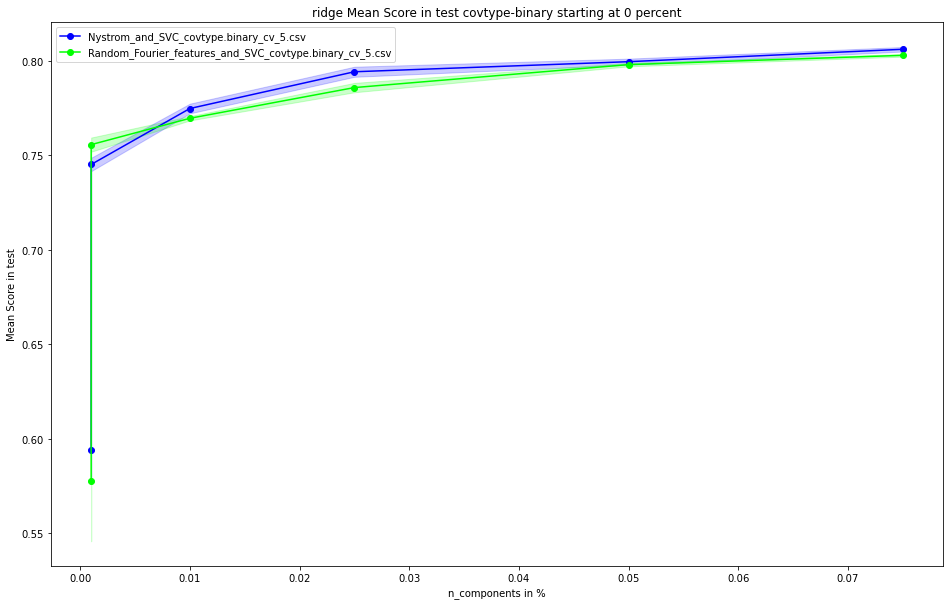

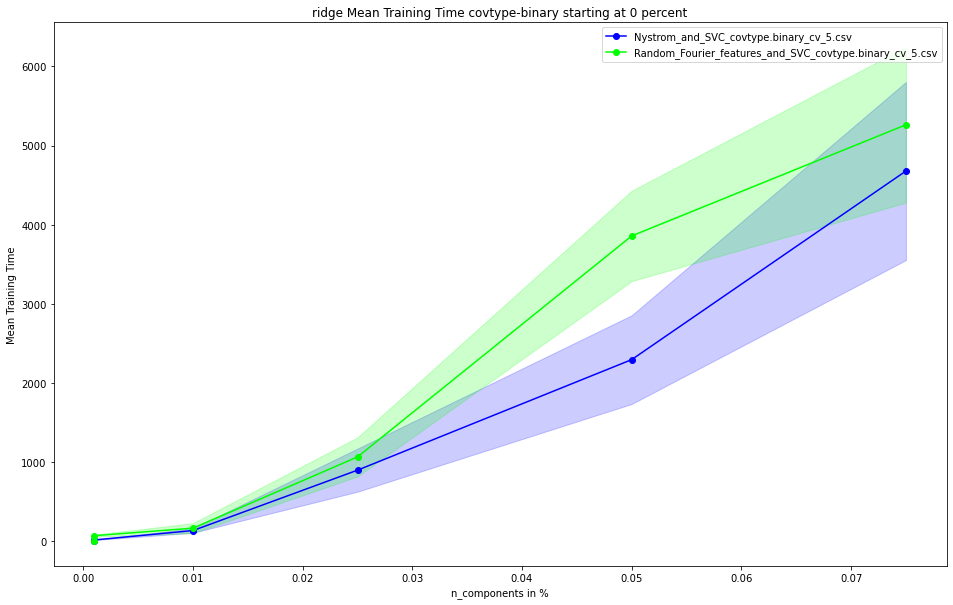

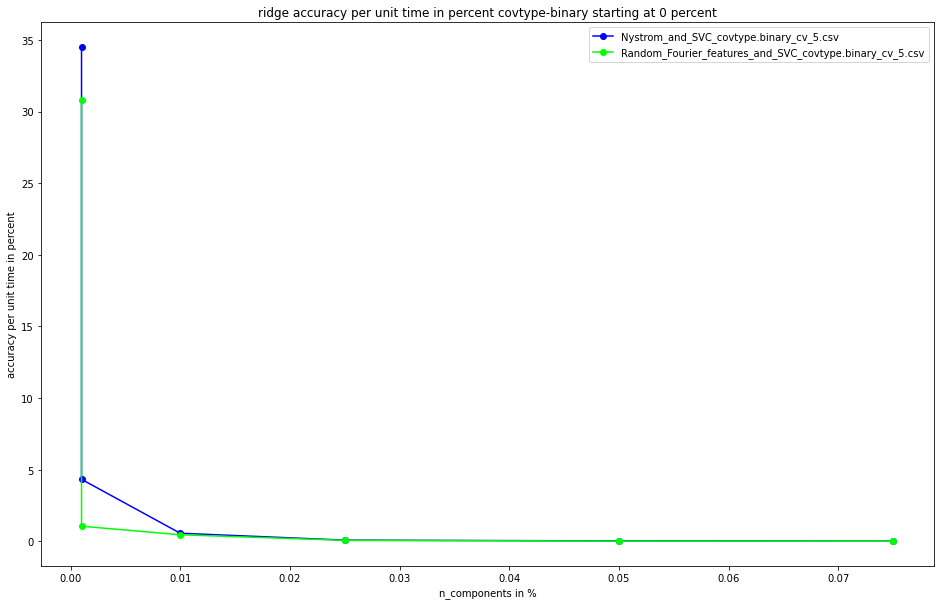

In [10]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0, marker='o')
